# 1<sup>η</sup> Εργασία - Διερευνώντας τον Καιρό στην Αθήνα

Το παρόν αρχείο Jupyte Notebook, αποτελεί την δική μου λύση και ερμηνεία, των αποτελεσμάτων για την πρώτη εκ των τριών τελικών εργασιών του διαδικτυακού μαθήματος, “Επιστήμη Δεδομένων και Εφαρμοσμένη Μηχανική Μάθηση με Python” που προσφέρει το Mathesis.

---
> Χάκα Κέβιν <br />
> Aπόφοιτος του <br />
> Τμήματος Επιστήμης των Υλικών <br />
> Πανεπιστημίου Πατρών

> kevihaka@gmail.com

In [1]:
#Εισάγουμε τις βιβλιοθήκες που θα χρειαστούμε

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from plotnine import *

In [2]:
#Εισάγουμε τα δεδομένα από τα αντίστοιχα αρχεία

noaa_df = pd.read_csv("noaa_hellinikon_1995_2020.csv.zip")
noaa_df.head(3)

,STATION,NAME,DATE,TAVG
0,GR000016716,"HELLINIKON, GR",1955-01-01,NaN
1,GR000016716,"HELLINIKON, GR",1955-01-02,NaN
2,GR000016716,"HELLINIKON, GR",1955-01-03,NaN


In [3]:
#Ελέγχουμε την πληρότητα των δεδομένων

noaa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23251 entries, 0 to 23250
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  23251 non-null  object 
 1   NAME     23251 non-null  object 
 2   DATE     23251 non-null  object 
 3   TAVG     20940 non-null  float64
dtypes: float64(1), object(3)
memory usage: 726.7+ KB


In [4]:
sum(noaa_df.TAVG.isnull())

2311

Παραπάνω παρατηρούμε έλλειψη **2311** δεδομένων στην στήλη **TAVG** </br>
Θα προσπαθήσουμε να συμπληρώσουμε όσα περισσότερα μπορούμε με την βοήθεια ενός άλλου πινάκα δεδομένων

In [5]:
#Important Notes
#-------------------
#Temperature          (°C)   --> T
#Relative Humidity    (%)    --> RH
#Atmospheric Pressure (hPa)  --> AP
#Rainfall             (mm)   --> Rf
#Wind Speed           (km/h) --> WS
#Dominant Wind Direction     --> DWD
#Wind Gust            (km/h) --> WG

columns_names=["DATE", "Mean_T", "Max_T", "Min_T",
              "Mean_RH", "Max_RH", "Min_RH",
              "Mean_AP", "Max_AP", "Min_AP",
              "Rf", "Mean_WS", "DWD", "WG"]

temporary_df = pd.read_csv("athens.csv", names=columns_names)
temporary_df.head(3)

,DATE,Mean_T,Max_T,Min_T,Mean_RH,Max_RH,Min_RH,Mean_AP,Max_AP,Min_AP,Rf,Mean_WS,DWD,WG
0,2010-01-01,17.9,18.1,17.8,61.4,91,33,1003.6,1006.3,1002.0,0.2,4.0,WSW,12.7
1,2010-01-02,15.6,15.7,15.5,57.4,70,45,1005.2,1008.7,1001.5,0.0,6.8,WSW,20.7
2,2010-01-03,13.5,13.6,13.4,56.0,76,39,1011.7,1016.7,1008.6,0.0,5.0,WSW,15.4


In [6]:
#Ενώνουμε εξωτερικά τους δύο πίνακες πάνω στην στήλη DATE

df = noaa_df.merge(temporary_df, how="outer", on="DATE")
df.head(3)

,STATION,NAME,DATE,TAVG,Mean_T,Max_T,Min_T,Mean_RH,Max_RH,Min_RH,Mean_AP,Max_AP,Min_AP,Rf,Mean_WS,DWD,WG
0,GR000016716,"HELLINIKON, GR",1955-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,GR000016716,"HELLINIKON, GR",1955-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,GR000016716,"HELLINIKON, GR",1955-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Παρακάτω δημιουργούμε μια καινούρια στήλη που την ονομάζουμε **MT** από το **Mean Temperature**, η οποία παίρνει τις τιμές από την στήλη **TAVG** για όσες ημερομηνίες υπάρχουν και τις υπόλοιπες τις συμπληρώνει από την στήλη **Mean_T**. Έπειτα δημιουργούμε άλλον έναν πίνακα ο οποίος αποτελείται μόνο από τις στήλες **DATE** και **MT**.

In [7]:
Mean_Temperature = [df.TAVG[i] if not np.isnan(df.TAVG[i]) else df.Mean_T[i] for i in range(0,len(df.DATE))]
df["MT"] = Mean_Temperature
final_df = df[["DATE","MT"]].copy()
final_df.drop(final_df[final_df.MT == "---"].index, inplace=True)
final_df.head(3)

,DATE,MT
0,1955-01-01,NaN
1,1955-01-02,NaN
2,1955-01-03,NaN


In [8]:
before = len(noaa_df.TAVG) - sum(noaa_df.TAVG.isnull())
after = sum(final_df.MT.notna())
print(after - before)
print(round((after - before)*100/before,2),"%", sep="")

852
4.07%


Εν τέλει αυξήσαμε τα δεδομένα μας κατά **852** τιμές που αντιστοιχούν σε αύξηση περίπου **4%**

Παρακάτω μετατρέπουμε την στήλη **DATE** σε αντικείμενο **datetime** και την στήλη **MT** σε **float64**, έπειτα ορίζουμε την στήλη **DATE** ως δείκτες και την στοιχίζουμε.

In [9]:
final_df["MT"] = final_df.MT.astype('float64')
final_df["DATE"] = final_df.DATE.astype('datetime64[ns]')
final_df.set_index("DATE", inplace=True)
final_df.sort_index(inplace=True)
final_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24103 entries, 1955-01-01 to 2020-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MT      21792 non-null  float64
dtypes: float64(1)
memory usage: 376.6 KB


In [10]:
#Κρατάμε μόνο τους καλοκαιρινούς μήνες Ιούνιο Ιούλιο Αύγουστο

June_to_August = final_df[final_df.index.month.isin([6,7,8])]
June_to_August.head(3)

,MT
DATE,
1955-06-01,NaN
1955-06-02,NaN
1955-06-03,NaN


In [11]:
#average daily summer temperature since 1974 - 1999

adst = June_to_August.loc['1974':'1999'].MT.mean()
adst

26.23214585079631

In [12]:
#Παίρνουμε την ημερήσια μέση τιμή του καλοκαιριού

mean_June_to_August = June_to_August.groupby(June_to_August.index.year).mean()
mean_June_to_August.head(3)

,MT
DATE,
1955,NaN
1956,NaN
1957,28.091935


In [13]:
#Δημιουργούμε μια στήλη difference και μια στήλη 10Y_MA_Temperature (10 years moving average temperature)
#Έπειτα κάνουμε και μερικές διορθώσεις στα δεδομένα 

mean_June_to_August["difference"] = mean_June_to_August.MT - adst
mean_June_to_August["10Y_MΑ_Temperature"]  = mean_June_to_August.difference.rolling(10, min_periods=1).mean()
mean_June_to_August['difference'].fillna(0, inplace=True)
mean_June_to_August['10Y_MΑ_Temperature'].ffill(inplace=True)
mean_June_to_August.dropna(subset='10Y_MΑ_Temperature', inplace=True)
mean_June_to_August.reset_index(inplace=True)

mean_June_to_August.head(3)

,DATE,MT,difference,10Y_MΑ_Temperature
0,1957,28.091935,1.859790,1.859790
1,1958,27.081522,0.849376,1.354583
2,1959,NaN,0.000000,1.354583


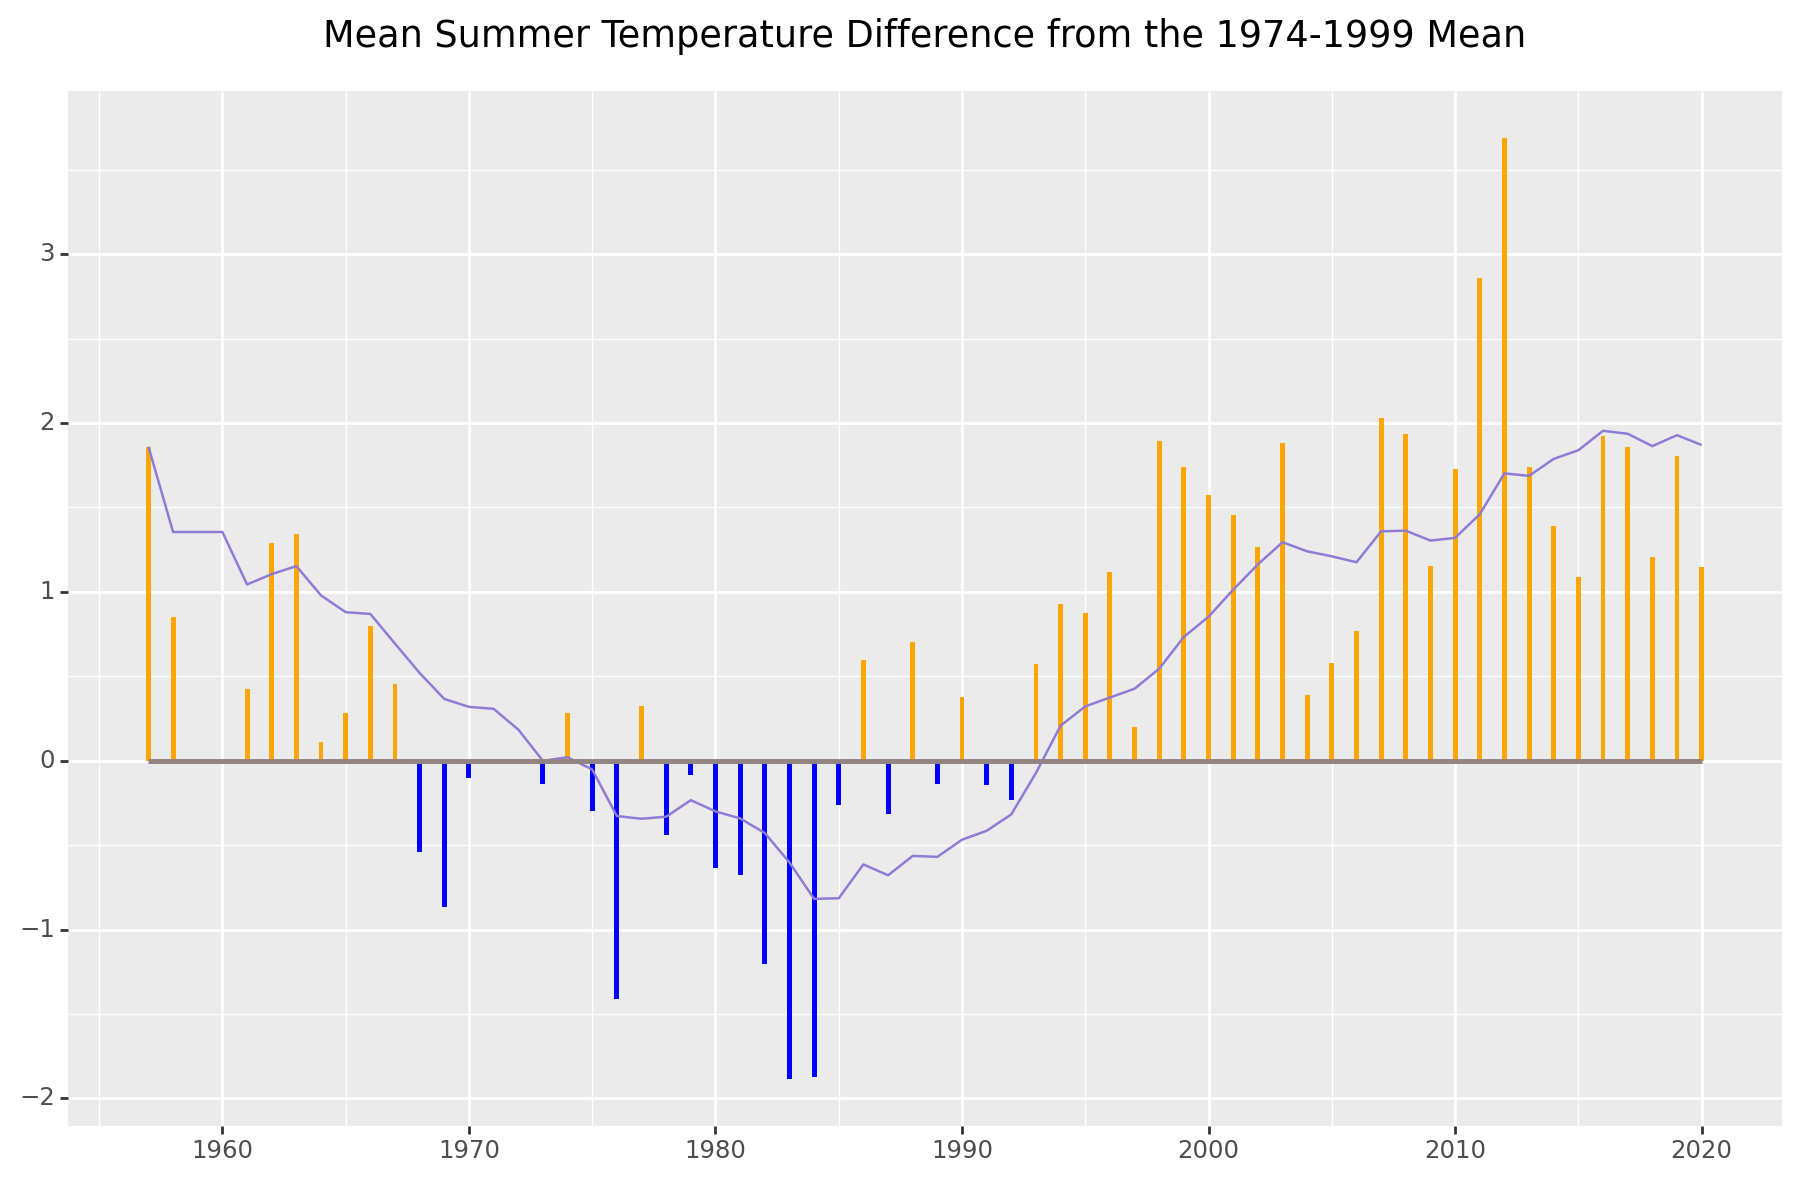

<Figure Size: (900 x 600)>

In [14]:
#Το ζητούμενο διάγραμμα 

(ggplot(mean_June_to_August, aes(x='DATE'))
 + geom_bar(aes(y='difference', fill=(mean_June_to_August['difference'] > 0)), stat='identity', width=0.2) 
 + scale_fill_manual(values=['blue','orange'])
 + geom_line(aes(y="10Y_MΑ_Temperature"), color='#8F7AD6')
 + geom_line(aes(y=[0]*len(mean_June_to_August.DATE)), color='#938484', size=1.)
 + theme(legend_position="none", figure_size=(9, 6))
 + theme(axis_title=element_blank(), plot_title=element_text(ha='center'))
 + ggtitle('Mean Summer Temperature Difference from the 1974-1999 Mean')
 + scale_x_continuous(breaks=range(1960,2020+1,10))
 + scale_y_continuous(breaks=range(-2,3+1))
)

Στο παραπάνω διάγραμμα παρατηρούμε την διαφορά της μέσης θερμοκρασίας το καλοκαίρι ανά τα έτη βάση μιας μέσης θερμοκρασίας καλοκαιριού τα χρονιά **1974 – 1999**, και με γαλάζια γραμμή αναπαριστούμε τον κινητό μέσο **δέκα ετών**. Αυτό που φαίνεται ξεκάθαρα στο διάγραμμα είναι η κάθοδος της θερμοκρασίας από το **1957 – 1984**, και έπειτα άνοδος μέχρι σήμερα. Επειδή ο κινητός μέσος όρος βασίζεται σε παρελθοντικά δεδομένα, μας δείχνει καλύτερα την τάση όσο περισσότερα είναι αυτά τα δεδομένα, στην δικιά μας περίπτωση λοιπόν που έχουμε έναν κινητό μέσο **10 ετών**, η γαλάζια γραμμή μας δείχνει την τάση της μέσης καλοκαιρινής θερμοκρασίας, η οποία έχει ξεκάθαρα μια ανοδική πορεία τα τελευταία **35 περίπου χρονιά**, αν και τα δεδομένα μιας μόνο περιοχής  και για μια τόσο μικρή χρονική περίοδο δεν είναι επαρκεί για γενικά συμπεράσματα, άλλα ίσως, να είναι μια ένδειξη για το **φαινόμενο του θερμοκηπίου**. Τέλος να προσθέσω πως οι θερμοκρασίες που αποκλίνουν πολύ από τον κινητό μέσο όρο είναι ανησυχητικές γιατί δεν αναμένονται, όπως για παράδειγμα, το **1984** που θα μπορούσαμε να το αποκαλέσουμε **το πιο δροσερό καλοκαίρι** και το **2012 το πιο καυτό καλοκαίρι στην Αθήνα**.

Παρακάτω κάνουμε μια **εξομάλυνση 30 ήμερον** στις μέσες ημερήσιες θερμοκρασίες και δημιουργούμε μια επιπλέων στήλη που αντιστοιχίσουμε κάθε μέρα του χρόνου σε ένα δεκαδικό αριθμό στο διάστημα **[0,13)** για να τον χρησιμοποιήσουμε στον x άξονα.

In [15]:
pd.to_numeric(final_df.index.day)

Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
       ...
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype='int32', name='DATE', length=24103)

In [16]:
final_df['30D_MA_Temperature'] = final_df.MT.rolling("30D").mean()
final_df['Month_Day'] = pd.to_numeric(final_df.index.month) + (pd.to_numeric(final_df.index.day)-1)/31
final_df['Year'] = final_df.index.year
final_df.tail(3)

,MT,30D_MA_Temperature,Month_Day,Year
DATE,,,,
2020-12-29,16.3,14.153333,12.903226,2020
2020-12-30,16.4,14.193333,12.935484,2020
2020-12-31,15.4,14.293333,12.967742,2020


In [17]:
#mean temperature per day

mtpd = final_df[['MT','Month_Day']].groupby([final_df.index.month, final_df.index.day]).mean()
mtpd["30D_MA_Temperature"] = mtpd.MT.rolling(30, min_periods=1).mean()
mtpd

MT  Month_Day  30D_MA_Temperature
DATE DATE                                          
1    1     10.663333   1.000000           10.663333
     2     10.795000   1.032258           10.729167
     3     10.726667   1.064516           10.728333
     4     10.325000   1.096774           10.627500
     5     10.105000   1.129032           10.523000
...              ...        ...                 ...
12   27    11.178333  12.838710           12.009910
     28    11.383333  12.870968           11.928563
     29    11.451667  12.903226           11.851980
     30    11.378333  12.935484           11.783009
     31    11.078333  12.967742           11.705847

[366 rows x 3 columns]

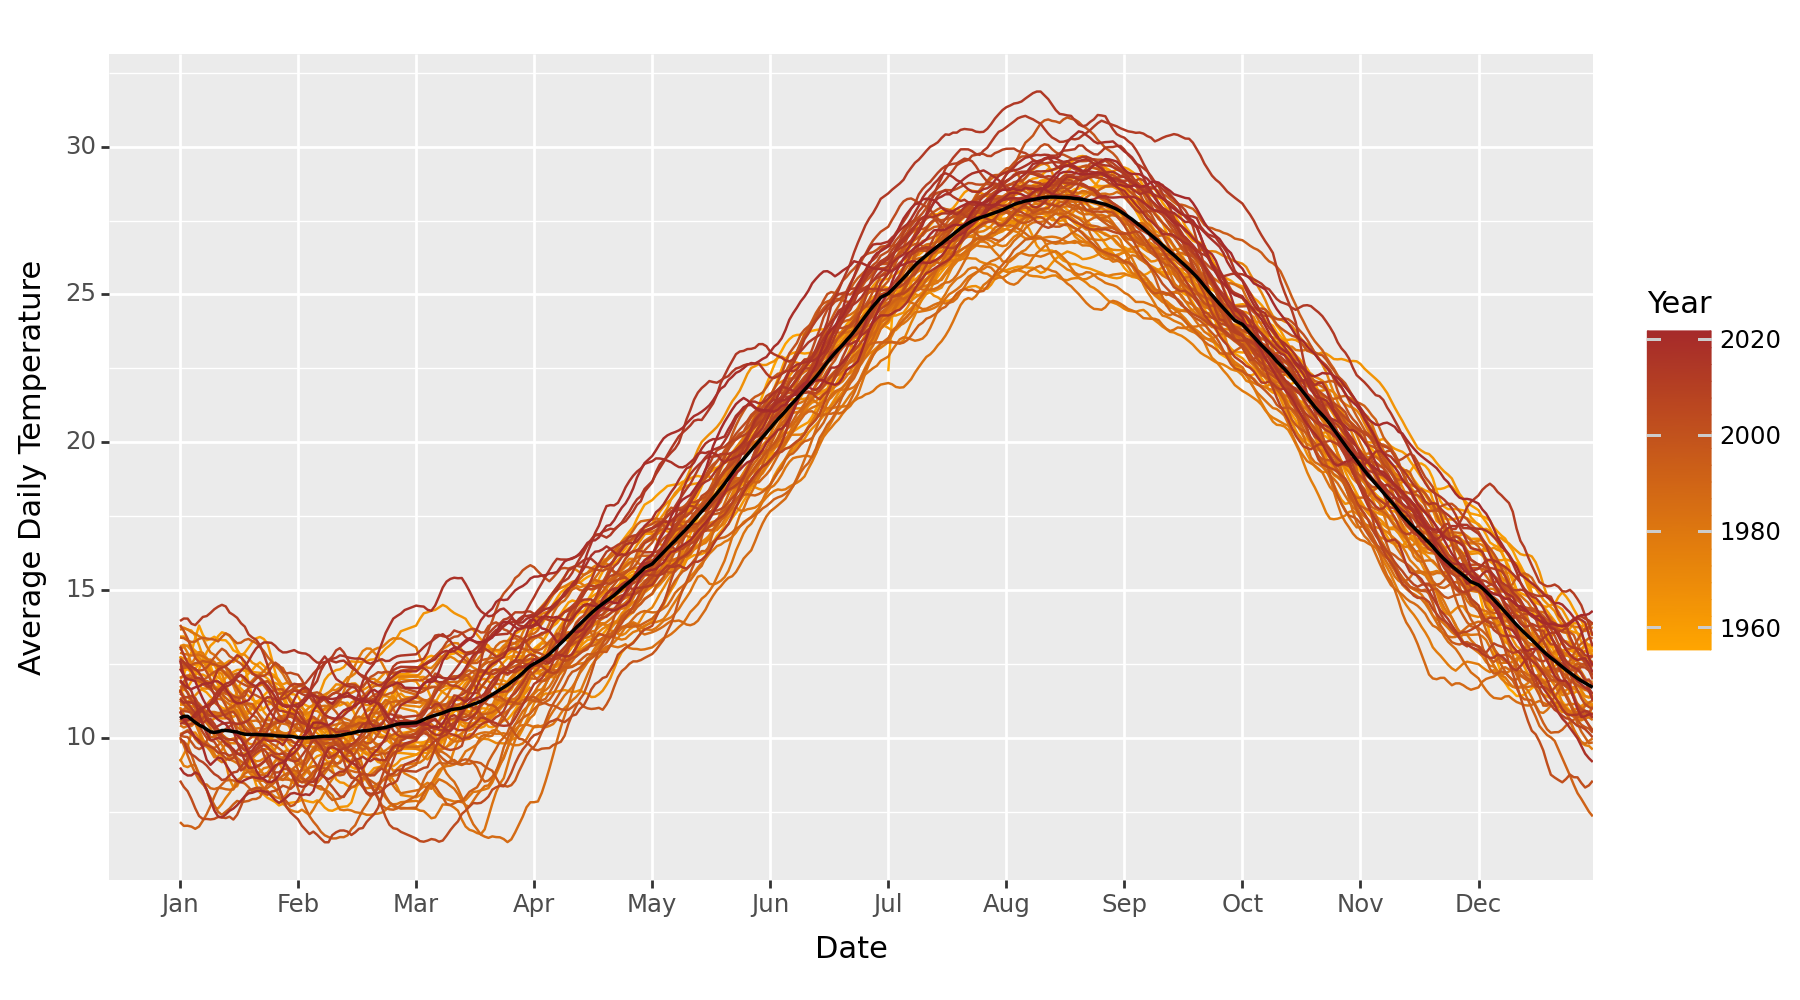

<Figure Size: (900 x 500)>

In [18]:
#Το ζητούμενο διάγραμμα 

(ggplot()
 + geom_line(final_df.dropna(), aes(x='Month_Day', y='30D_MA_Temperature', color='Year', group='Year'), size=0.5)
 + geom_line(mtpd, aes(x='Month_Day', y='30D_MA_Temperature'), size=0.7)
 + scale_color_gradient(low='orange', high='brown')
 + theme(figure_size=(9, 5))
 + labs(x='Date', y='Average Daily Temperature')
 + scale_x_discrete(limits=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
 + scale_y_continuous(breaks=range(10,30+1,5))
)

Στο διάγραμμα βλέπουμε πως μεταβάλλεται η μέση ημερήσια θερμοκρασία κατά την διάρκεια του έτους. Η πιο ζεστές μέρες του έτους στην Αθήνα είναι τον Αύγουστο και οι πιο κρύες είναι τέλος Ιανουαρίου αρχές Φλεβάρη. Επίσης θα μπορούσαμε να συμπεράνουμε πως οι Αθηναίοι ζουν σε μια αρκετά ευνοημένη περιοχή του πλανήτη αφού η μέση ημερήσια θερμοκρασία ετών (μαύρη γραμμή) τις πιο κρύες μέρες κυμαίνεται στους **10 °C** και τις πιο ζέστες ήμερες στους **27 °C** που είναι αρκετά καλές θερμοκρασίες για τον άνθρωπο. Τέλος ας προσέξουμε κάτι που δεν είναι εμφανές με μια πρώτη μάτια, ας επικεντρωθούμε στον Αύγουστο όπου το φαινόμενο είναι αρκετά έντονο, εκεί βλέπουμε τις πιο σκουρόχρωμες γραμμές να βρίσκονται πάνω από την μαύρη γραμμή και τις πιο ανοιχτόχρωμες από κάτω, όπως μαρτυρά και η διαβάθμιση που βρίσκεται δεξιά του διαγράμματος, όσο πιο έντονο το χρώμα τόσο πιο πρόσφατο το έτος, όπως και στο προηγούμενο διάγραμμα έτσι και εδώ είναι αντιληπτή μια μετατόπιση της θερμοκρασίας προς τα πάνω, πράγμα που μας ενδεικνύει και πάλη το φαινόμενο του θερμοκηπίου.